In [1]:
from config import get_config

# Loading and Seperating the data

In [2]:
import pandas as pd 

In [3]:
config = get_config()
if config is None:
    print("Error in loading config")
    exit()

df = pd.read_csv(config['data_filename'])
df.head()

,Class,x0,y0,z0,x1,y1,z1,x2,y2,z2,...,xz7,x18,y18,xz8,x19,y19,xz9,x20,y20,xz0.1
0,Idle,0.786796,0.577150,0.115430,0.709950,0.577456,0.115491,0.650219,0.505047,0.101009,...,0.069796,0.846396,0.251107,0.050221,0.854599,0.192672,0.038534,0.856386,0.139195,0.027839
1,Idle,0.779948,0.576534,0.115307,0.708210,0.554418,0.110884,0.645107,0.476407,0.095281,...,0.057798,0.812656,0.201072,0.040214,0.817781,0.150189,0.030038,0.819031,0.107402,0.021480
2,Idle,0.767243,0.551988,0.110398,0.695155,0.527266,0.105453,0.632155,0.450202,0.090040,...,0.053778,0.791888,0.188215,0.037643,0.794474,0.139420,0.027884,0.792905,0.095832,0.019166
3,Idle,0.760346,0.537077,0.107415,0.688991,0.513563,0.102713,0.627382,0.438035,0.087607,...,0.051791,0.779966,0.176823,0.035365,0.781542,0.127742,0.025548,0.780194,0.084989,0.016998
4,Idle,0.748377,0.534202,0.106840,0.678455,0.511702,0.102340,0.618582,0.433393,0.086679,...,0.053269,0.768897,0.184995,0.036999,0.770385,0.137163,0.027433,0.769226,0.094693,0.018939


In [4]:
label = df['Class']
features = df.drop('Class', axis=1)

# print(features.columns)

# Normalizing the data

In [5]:
from sklearn.preprocessing import Normalizer

In [6]:

feature_normalizer = Normalizer().fit(features)
featureNormalized = feature_normalizer.transform(features)

# Dimension reduction and Plotting

In [7]:
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np


# 2D 

In [8]:

tnse_2d = TSNE(n_components=2)

features_2d = tnse_2d.fit_transform(featureNormalized)

# Plotting the data 

Text(0.5, 1.0, 'Gesture classes 2D')

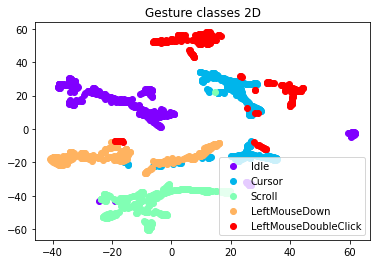

In [9]:

totalClasses = list(
    label.unique()
    )

total_color = cm.rainbow(np.linspace(0, 1, len(totalClasses)))


for idx, class_name in enumerate(totalClasses):
    indices = (label == class_name)
    plt.scatter(
        x= features_2d[indices, 0],
        y= features_2d[indices, 1],
        color = total_color[idx],
        label = class_name,
    )
plt.legend()
plt.title('Gesture classes 2D')

# 3D 

In [10]:

tnse_3d = TSNE(n_components=3)

features_3d = tnse_3d.fit_transform(featureNormalized)

Text(0.5, 0.92, 'Gesture classes 3D')

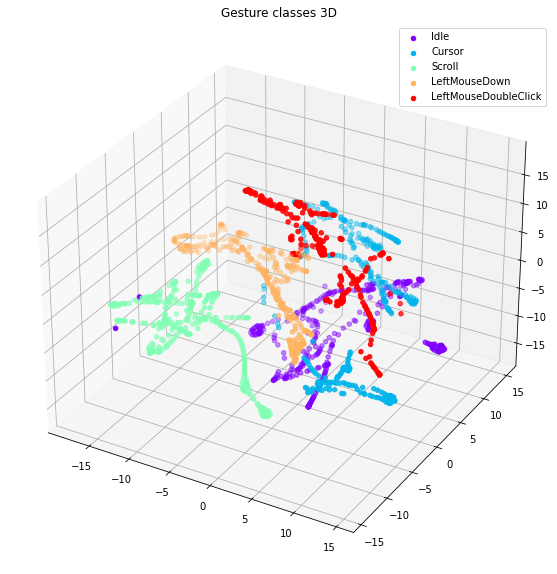

In [11]:

totalClasses = list(
    label.unique()
    )

total_color = cm.rainbow(np.linspace(0, 1, len(totalClasses)))

fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

for idx, class_name in enumerate(totalClasses):
    indices = (label == class_name)
    ax.scatter3D(
        features_3d[indices, 0],
        features_3d[indices, 1],
        features_3d[indices, 2],
        color = total_color[idx],
        label = class_name,
    )
plt.legend()
plt.title('Gesture classes 3D')